In [121]:
#import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [122]:
#visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [123]:
#locating the dataframe file and displaying some basic information of the data
df = pd.read_csv('cleaned_api.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30407 entries, 0 to 30406
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              30407 non-null  int64  
 1   Time                    30407 non-null  object 
 2   Alor Gajah              30407 non-null  float64
 3   Alor Setar              30407 non-null  float64
 4   Balok Baru Kuantan      30407 non-null  float64
 5   Bandaraya Melaka        30407 non-null  float64
 6   Banting                 30407 non-null  float64
 7   Batu Muda               30407 non-null  float64
 8   Bintulu                 30407 non-null  float64
 9   Bukit Rambai            30407 non-null  float64
 10  Cheras                  30407 non-null  float64
 11  Indera Mahkota Kuantan  30407 non-null  float64
 12  Jerantut                30407 non-null  float64
 13  Kangar                  30407 non-null  float64
 14  Kapit                   30407 non-null

In [124]:
date_time = pd.DataFrame(df.Time.str.split(' ',1).tolist(),
                                 columns = ['Date','Masa'])
df = pd.concat([date_time.reset_index(drop=True), df], axis=1)
df.drop(df.iloc[:, 2:4], inplace=True, axis=1)
df.head()

,Date,Masa,Alor Gajah,Alor Setar,Balok Baru Kuantan,Bandaraya Melaka,Banting,Batu Muda,Bintulu,Bukit Rambai,...,Seri Manjung,Shah Alam,Sibu,Sri Aman,Sungai Petani,Taiping,Tanah Merah,Tanjung Malim,Tasek Ipoh,Tawau
0,2018-02-25,07:00,12.0,15.0,37.0,19.0,22.0,10.0,21.0,19.0,...,18.0,31.0,22.0,13.0,16.0,22.0,24.0,11.0,22.0,14.0
1,2018-02-25,12:00,13.0,17.0,36.0,21.0,18.0,13.0,21.0,20.0,...,20.0,22.0,23.0,13.0,16.0,20.0,27.0,13.0,22.0,14.0
2,2018-02-25,13:00,13.0,18.0,35.0,22.0,19.0,14.0,21.0,20.0,...,20.0,22.0,22.0,13.0,16.0,23.0,27.0,15.0,23.0,15.0
3,2018-02-27,16:00,16.0,21.0,33.0,24.0,34.0,28.0,28.0,27.0,...,26.0,61.0,26.0,12.0,24.0,30.0,30.0,29.0,27.0,11.0
4,2018-02-27,17:00,15.0,21.0,32.0,24.0,39.0,32.0,28.0,27.0,...,27.0,101.0,26.0,12.0,30.0,31.0,31.0,32.0,30.0,16.0


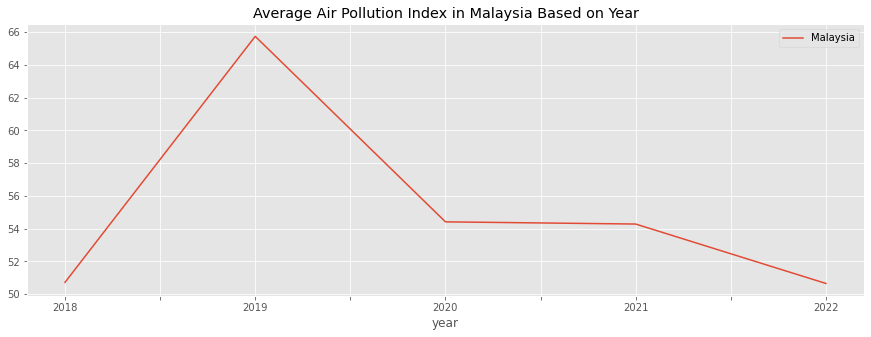

In [125]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].map(lambda dt: dt.strftime('%Y'))
group_year_df = df.groupby('year').mean().reset_index()
group_year_df.plot.line(x='year',y='Putrajaya', 
                        title='Average Air Pollution Index in Malaysia Based on Year',
                        figsize=(15, 5))
plt.legend(["Malaysia"]);

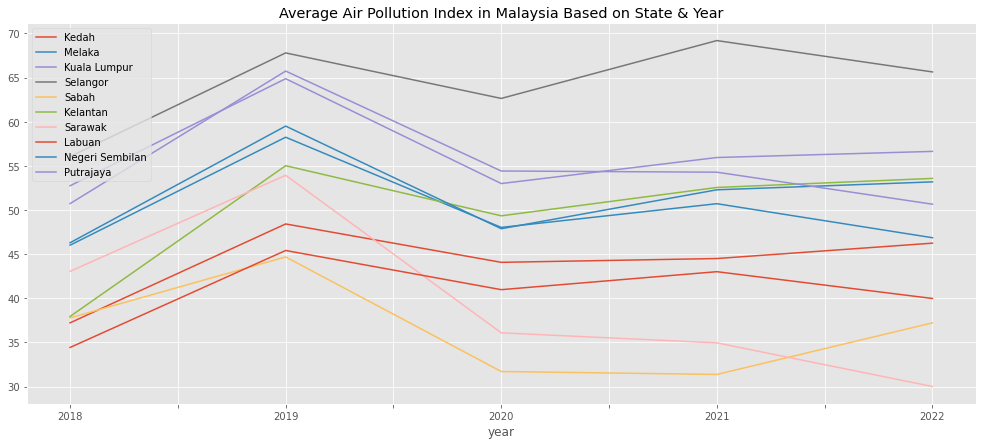

In [126]:
columns1= ['Alor Setar','Bandaraya Melaka','Cheras','Klang',
       'Kota Kinabalu', 'Kota Bharu', 'Kuching', 'Labuan', 'Port Dickson',
         'Putrajaya']
group_year_df.plot.line(x='year',y=columns1, figsize=(17, 7), 
                       title='Average Air Pollution Index in Malaysia Based on State & Year')
plt.legend(['Kedah', 'Melaka', 'Kuala Lumpur','Selangor', 'Sabah', 'Kelantan',
           'Sarawak','Labuan','Negeri Sembilan','Putrajaya']);

In [127]:
df['Date'] = pd.to_datetime(df['Date'])
df['year_month'] = df['Date'].map(lambda dt: dt.strftime('%Y-%m'))

<AxesSubplot:title={'center':'Air Pollution Index in Kedah'}, xlabel='year_month'>

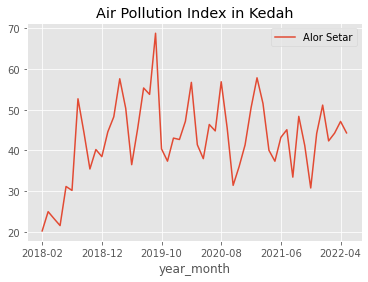

In [128]:
grouped_df.plot.line(x='year_month', y='Alor Setar', title='Air Pollution Index in Kedah')

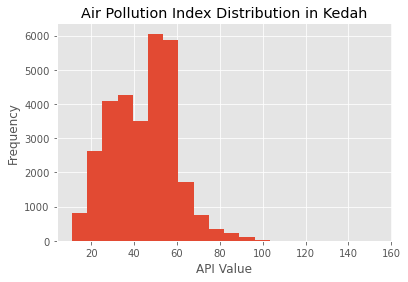

In [129]:
plt.hist(df["Alor Setar"], bins=20)
plt.xlabel("API Value")
plt.ylabel("Frequency")
plt.title("Air Pollution Index Distribution in Kedah")
plt.show()

<AxesSubplot:title={'center':'Air Pollution Index in Melaka'}, xlabel='year_month'>

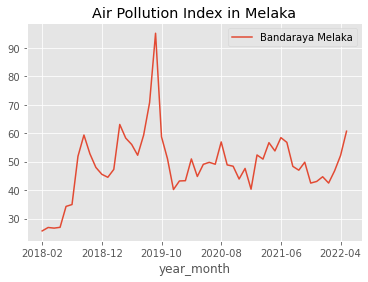

In [130]:
grouped_df.plot.line(x='year_month', y='Bandaraya Melaka', title='Air Pollution Index in Melaka')

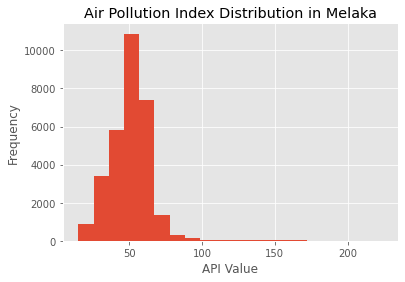

In [131]:
plt.hist(df["Bandaraya Melaka"], bins=20)
plt.xlabel("API Value")
plt.ylabel("Frequency")
plt.title("Air Pollution Index Distribution in Melaka")
plt.show()

<AxesSubplot:title={'center':'Air Pollution Index in Kuala Lumpur'}, xlabel='year_month'>

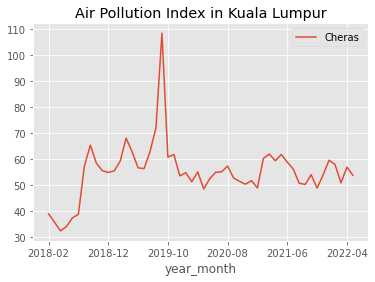

In [132]:
# plt.plot(df["Time"], df["Cheras"])
# plt.xlabel("Date")
# plt.ylabel("API Value")
# plt.title("Air Pollution Index in Kuala Lumpur")
# plt.show()
grouped_df.plot.line(x='year_month', y='Cheras', title='Air Pollution Index in Kuala Lumpur')

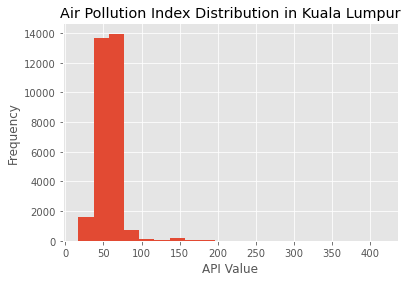

In [133]:
plt.hist(df["Cheras"], bins=20)
plt.xlabel("API Value")
plt.ylabel("Frequency")
plt.title("Air Pollution Index Distribution in Kuala Lumpur")
plt.show()

<AxesSubplot:title={'center':'Air Pollution Index in Selangor'}, xlabel='year_month'>

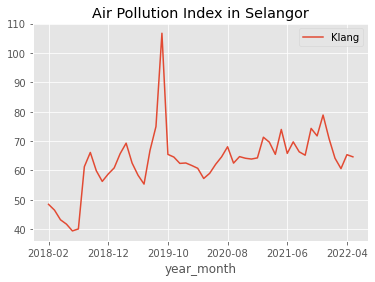

In [134]:
grouped_df.plot.line(x='year_month', y='Klang', title='Air Pollution Index in Selangor')

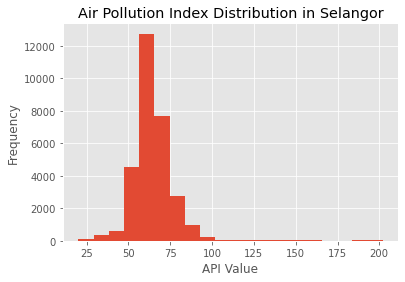

In [135]:
plt.hist(df["Klang"], bins=20)
plt.xlabel("API Value")
plt.ylabel("Frequency")
plt.title("Air Pollution Index Distribution in Selangor")
plt.show()

<AxesSubplot:title={'center':'Air Pollution Index in Sabah'}, xlabel='year_month'>

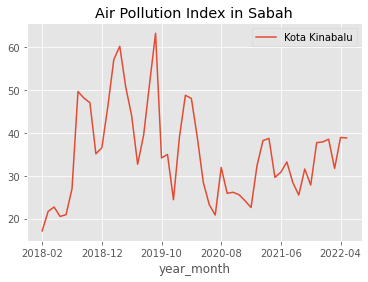

In [136]:
grouped_df.plot.line(x='year_month', y='Kota Kinabalu', title='Air Pollution Index in Sabah')

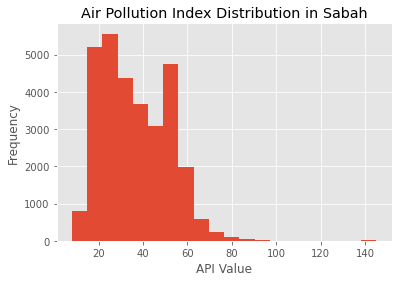

In [137]:
plt.hist(df["Kota Kinabalu"], bins=20)
plt.xlabel("API Value")
plt.ylabel("Frequency")
plt.title("Air Pollution Index Distribution in Sabah")
plt.show()

<AxesSubplot:title={'center':'Air Pollution Index in Kelantan'}, xlabel='year_month'>

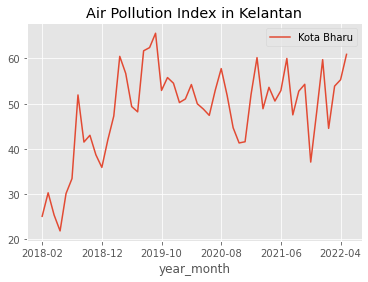

In [138]:
grouped_df.plot.line(x='year_month', y='Kota Bharu', title='Air Pollution Index in Kelantan')

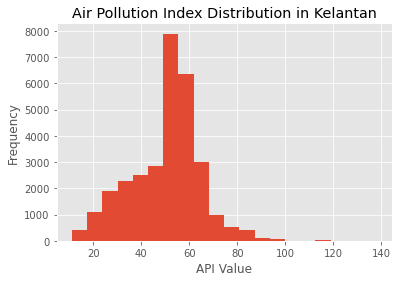

In [139]:
plt.hist(df["Kota Bharu"], bins=20)
plt.xlabel("API Value")
plt.ylabel("Frequency")
plt.title("Air Pollution Index Distribution in Kelantan")
plt.show()

<AxesSubplot:title={'center':'Air Pollution Index in Sarawak'}, xlabel='year_month'>

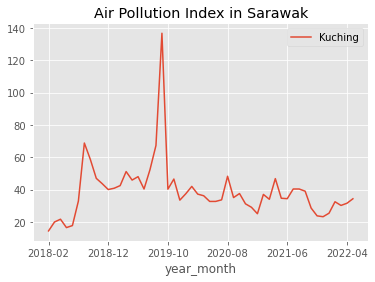

In [140]:
grouped_df.plot.line(x='year_month', y='Kuching', title='Air Pollution Index in Sarawak')

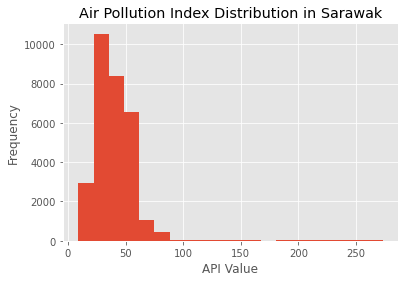

In [141]:
plt.hist(df["Kuching"], bins=20)
plt.xlabel("API Value")
plt.ylabel("Frequency")
plt.title("Air Pollution Index Distribution in Sarawak")
plt.show()

<AxesSubplot:title={'center':'Air Pollution Index in Labuan'}, xlabel='year_month'>

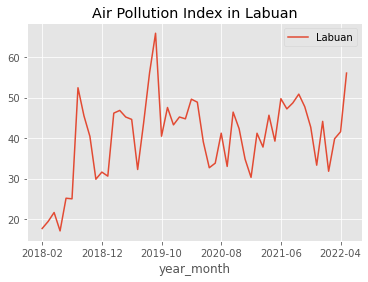

In [142]:
grouped_df.plot.line(x='year_month', y='Labuan', title='Air Pollution Index in Labuan')

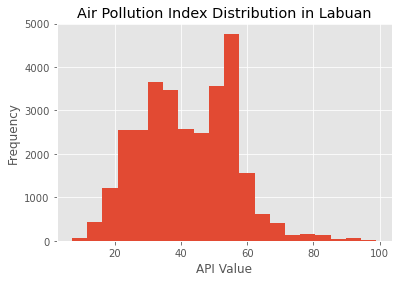

In [143]:
plt.hist(df["Labuan"], bins=20)
plt.xlabel("API Value")
plt.ylabel("Frequency")
plt.title("Air Pollution Index Distribution in Labuan")
plt.show()

<AxesSubplot:title={'center':'Air Pollution Index in Negeri Sembilan'}, xlabel='year_month'>

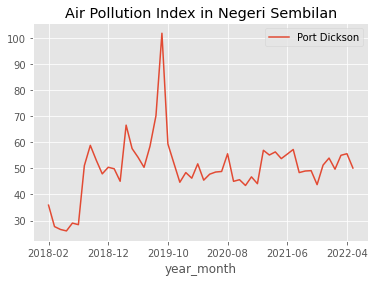

In [144]:
grouped_df.plot.line(x='year_month', y='Port Dickson' , title='Air Pollution Index in Negeri Sembilan')

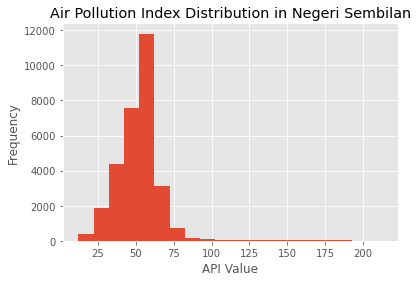

In [145]:
plt.hist(df["Port Dickson"], bins=20)
plt.xlabel("API Value")
plt.ylabel("Frequency")
plt.title("Air Pollution Index Distribution in Negeri Sembilan")
plt.show()

<AxesSubplot:title={'center':'Air Pollution Index in Putrajaya'}, xlabel='year_month'>

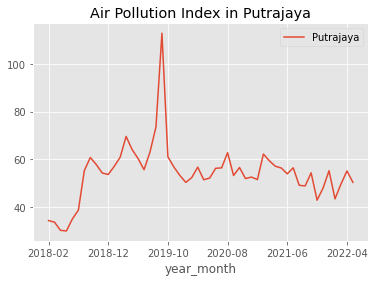

In [146]:
grouped_df.plot.line(x='year_month', y='Putrajaya' , title='Air Pollution Index in Putrajaya')

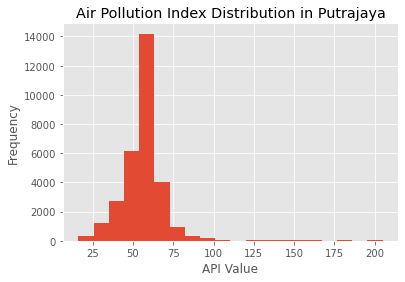

In [147]:
plt.hist(df["Putrajaya"], bins=20)
plt.xlabel("API Value")
plt.ylabel("Frequency")
plt.title("Air Pollution Index Distribution in Putrajaya")
plt.show()